In [1]:
import os
import sys
import argparse

import json
import pandas as pd
import numpy as np

sys.path.append('../../')

import Maranga.utils.parse_multismiles as mutils
import Maranga.scripts.fingerprints as fings
import aizynthfinder.context.scoring as scoring
import aizynthfinder.context.config as con

from aizynthfinder.analysis import ReactionTree
from rdkit.Chem import rdChemReactions
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import euclidean



In [2]:
#convert input to list of rxns
data_e = mutils.read_hdf('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/explore/results/tg1_explore_3.hdf5')
solved_data_e = data_e.loc[(data_e.is_solved==True)]
solved_trees_e = mutils.collect_trees(solved_data_e)

In [29]:
#convert input to list of rxns
data_s = mutils.read_hdf('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/explore/results/tg1_std_1.hdf5')
solved_data_s = data_s.loc[(data_s.is_solved==True)]
solved_trees_s = mutils.collect_trees(solved_data_s)

In [33]:
print(len(solved_data_s))
print(len(solved_data_e))

88
88


In [9]:
#test 'distance to':
molecule_dists = []
for mol in solved_trees_e:
    reaction_dists = []
    reactions = [ReactionTree.from_dict(i) for i in mol]
    for index, r in enumerate(reactions):
        for r2 in reactions[index:]:
            reaction_dists.append(r.distance_to(r2))
    molecule_dists.append(reaction_dists)


In [13]:
flatten = []
for i in molecule_dists:
    flatten.extend(i)

largest = []
for i in molecule_dists:
    largest.append(max(i))  

# print see whether the reactions are the same across both. 
# determine how exactly they are calculating distance. =>  distances.py file

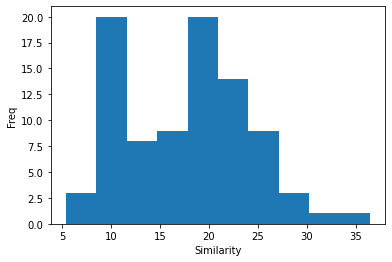

In [14]:
#plot SCATTER of all distances

%matplotlib inline
import matplotlib.pyplot as plt


plt.hist(largest)
#plt.hist(largest)
plt.xlabel('Similarity')
plt.ylabel('Freq')
#plt.ylim(0,100)
#plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/Images/tg1e3_split_lsim.png')
plt.show()

In [30]:
#parse imported reaction trees
reactions_e = fings.parse_input(solved_trees_e, 'explore')
reactions_s = fings.parse_input(solved_trees_s, 'normal')
reactions = reactions_e + reactions_s

Multiple Molecules
Multiple Molecules


In [31]:
#generate fingerprints
fingerprints = fings.generate_fingerprints(reactions)

Print lengh of reaction vector:  258


In [32]:
#determine the largset similarity of explore reactions to all other 'normal' reactions
largest, lengths = fings.split_similarity(reactions_e, reactions_s)

In [34]:
print(largest)

[1.0, 0.9767441860465116, 0.9922480620155039, 0.9728682170542635, 0.9728682170542635, 0.9689922480620154, 1.0, 0.9883720930232558, 1.0, 0.9767441860465116, 1.0, 0.9922480620155039, 1.0, 0.9844961240310077, 0.9844961240310077, 0.9883720930232558, 0.9961240310077519, 0.9883720930232558, 0.9844961240310077, 1.0, 0.9767441860465116, 1.0, 1.0, 0.9806201550387597, 0.9806201550387597, 1.0, 0.9689922480620154, 0.9806201550387597, 1.0, 1.0, 1.0, 0.9961240310077519, 1.0, 0.9806201550387597, 1.0, 0.9883720930232558, 1.0, 0.9612403100775194, 0.9612403100775194, 1.0, 1.0, 1.0, 1.0, 0.9961240310077519, 0.9961240310077519, 0.9961240310077519, 0.9961240310077519, 0.9961240310077519, 0.9961240310077519, 0.9961240310077519, 1.0, 1.0, 1.0, 1.0, 0.9844961240310077, 0.9844961240310077, 1.0, 1.0, 1.0, 0.9922480620155039, 1.0, 1.0, 0.9961240310077519, 1.0, 1.0, 0.9922480620155039, 0.9922480620155039, 1.0, 0.9922480620155039, 1.0, 0.9922480620155039, 1.0, 1.0, 1.0, 0.9844961240310077, 1.0, 1.0, 1.0, 0.9922480

In [35]:
print(sum(1 if i == 1.0 else 0 for i in largest))

265


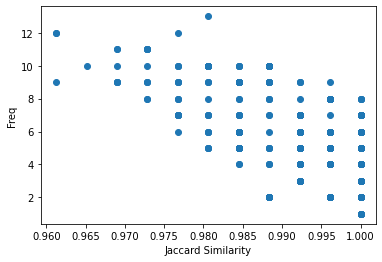

In [37]:
#plot SCATTER of largest similarity for explore against all normal

%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(largest, lengths)
#plt.hist(largest)
plt.xlabel('Jaccard Similarity')
plt.ylabel('Freq')
#plt.ylim(0,100)
plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/Images/tg1e3_split_lsim.png')
plt.show()

In [42]:
# return index of reactions within a specific range

val = [index for index, (x, y) in enumerate(zip(largest, lengths)) if (x < 0.965 and y < 13)]
print(val)

[37, 38, 393]


In [43]:
# fingerprint distance calculations
distances, largest_distances, reactions_dict = fings.calculate_distances(fingerprints)

In [44]:
print(reactions_dict[393])

{'molecule': 64, 'index': 393, 'reaction': {'type': 'mol', 'hide': False, 'smiles': 'O=S(=O)(NCC(c1ccsc1)N1CCCCCC1)c1cccs1', 'is_chemical': True, 'in_stock': False, 'children': [{'type': 'reaction', 'hide': False, 'smiles': '[NH2:1][CH2:2][C:3][C:4][CH3:5]>>[NH2:1][CH2:2][C:3]=[C:4][CH3:5]', 'is_reaction': True, 'metadata': {'template_hash': '8528f36b2382a78b703484f2e48cbd5766bb32b4e37b88a8cb85e135', 'classification': 'Alkene to alkane', 'library_occurence': 23, 'policy_probability': 9.999999747378752e-05, 'policy_name': 'uspto', 'template_code': 24391}, 'children': [{'type': 'mol', 'hide': False, 'smiles': 'O=S(=O)(NCC(c1ccsc1)N1CC=CCCC1)c1cccs1', 'is_chemical': True, 'in_stock': False, 'children': [{'type': 'reaction', 'hide': False, 'smiles': '[S:1](=[O:2])(=[O:3])([cH:4]:[S:5])[N:7][CH3:6]>>Cl[S:1](=[O:2])(=[O:3])[cH:4]:[S:5].[CH3:6][N:7]', 'is_reaction': True, 'metadata': {'template_hash': '1d781aebc1a47a7de08f204e0c37cc0fda5b48b67df5728be40e398a', 'classification': 'N-sulfonylati

In [9]:
# fingerprint similarity calculations
dists, smallest_sim, largest_sim, reactions_dict_2, lengths = fings.calculate_similarity(reactions_dict)

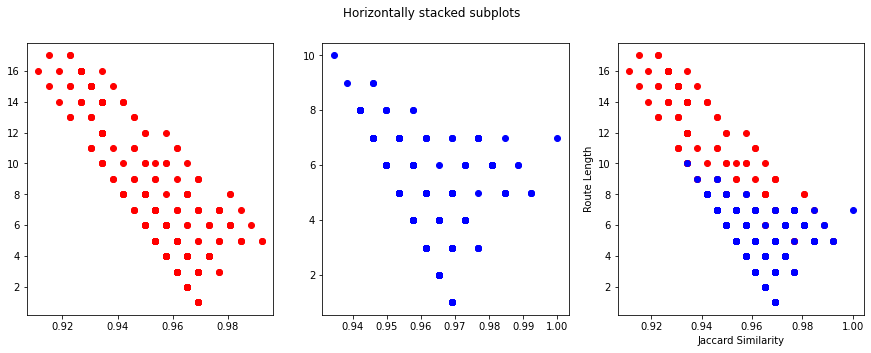

In [21]:
#plot SCATTER of largest similarity + route length

largest_sim_e = [i for index, i in enumerate(largest_sim) if reactions_dict_2[index].get('type') == 'explore']
largest_sim_s = [i for index, i in enumerate(largest_sim) if reactions_dict_2[index].get('type') == 'normal']
lengths_e = [i for index, i in enumerate(lengths) if reactions_dict_2[index].get('type') == 'explore']
lengths_s = [i for index, i in enumerate(lengths) if reactions_dict_2[index].get('type') == 'normal']


%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(largest_sim_e, lengths_e, c='red')
ax2.scatter(largest_sim_s, lengths_s, c='blue')
ax3.scatter(largest_sim_e, lengths_e, c='red')
ax3.scatter(largest_sim_s, lengths_s, c='blue')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Route Length')
#plt.ylim(0,100)
#plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/Images/tg1_all_sim+len.png')
plt.show()

In [19]:
#find routes that have similarity ca. 0.9 and length 10 - 12
indexes = []
for index, (x, y) in enumerate(zip(largest_sim, lengths)):
    if x < 0.92 and 10 <= y <= 14:
        indexes.append(index)
print(indexes)

[363]


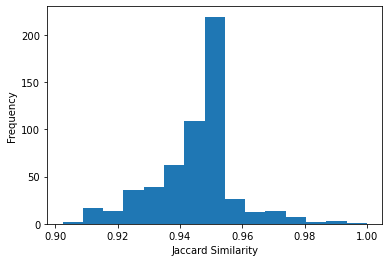

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(len(largest_sim))
plt.hist(smallest_sim, bins=15)
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
#plt.ylim(0,100)
#plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/Images/tg1_exp_all_msim.png')
plt.show()

In [13]:
zeros=[i for i in largest_sim if i < 0.90]
print(len(zeros))

print(len(largest_sim))

indexes = [index for index, item in enumerate(smallest_sim) if item >= 0.975]
print(indexes)

0
563
[20, 103, 107, 234, 249, 289, 293, 409, 438, 454, 475, 561, 562]


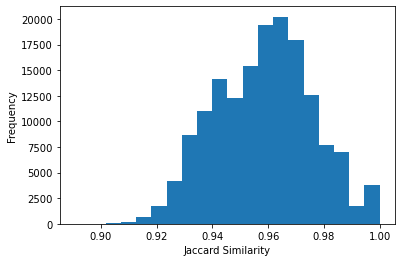

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(len(smallest_sim))
plt.hist(dists, bins=20)
plt.xlabel('Jaccard Similarity')
plt.ylabel('Frequency')
#plt.ylim(0,100)
plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/Images/tg1_std_all_jacc.png')
plt.show()